# Final Project Report

* Class: DS 5100
* Student Name: Hilde Younce
* Student Net ID: ksg8xy
* This URL: https://github.com/hyounce/ds5100-finalproject-ksg8xy/blob/main/montecarlo/DS51200_FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/hyounce/ds5100-finalproject-ksg8xy

Paste a copy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```
import numpy as np
import pandas as pd
import random

class Die:
    '''
    A class representing a die object with N faces and W weights, 
    which can be rolled to select a face one or more times.  

    Attributes: 
    - faces: A Numpy Array of unique symbols. Accepts numeric or string values.
    - weights: A list of weights corresponding to each face. Defaults to 1.0 for each face.
    - die_df: A pandas dataframe with faces as the index and a column for their corresponding weights. 

    Methods:
    - set_weight(face, int): Changes a face's weight to a new value.
    - roll_die(n_rolls=1): Selects a face n_rolls times. 
    '''

    def __init__(self, faces):
        '''
        Initializes the Die with faces and default weights of 1.0. 

        Input:
        - faces: A Numpy Array of unique numeric or string values. 

        Raises:
        - TypeError: If faces not a Numpy Array.
        - ValueError: If values in array are not numerics or strings, or if there are repeating values.
        '''

        types = ['i', 'f', 'U']

        if not isinstance(faces, np.ndarray):
            raise TypeError("Must be of type NumPy array.")
        elif faces.dtype.kind not in types:
            raise ValueError("Values must be of type string or int.")
        elif len(faces) != len(np.unique(faces)):
            raise ValueError("Array's values must be distinct.")
        else:
            self.faces = faces

        self.weights = [1 for x in range(len(self.faces))]
        self.die_df = pd.DataFrame({'weights': self.weights}, index=self.faces)

    
    def set_weight(self, face_val, new_weight):
        '''
        Changes a face's weight to a new value.

        Input:
        - face_val: String or numeric value corresponding to a value in faces.
        - new_weight: int or float

        Raises:
        - IndexError: If face_val not in faces array.
        - TypeError: If new_weight not int or float.
        '''

        if face_val not in self.faces:
            raise IndexError("Value not in faces array.")
        elif (type(new_weight) != int) and (type(new_weight) != float):
            raise TypeError("New weight must be int or float.")
        else:
            self.die_df.loc[face_val, "weights"] = new_weight
            self.weights = self.die_df['weights'].tolist()

    def roll_die(self, n_rolls=1):
        '''
        Selects a face one or more times and returns a list of results.

        Input:
        - n_rolls: int representing how many times to roll. Defaults to 1.

        Output:
        - rolls: Returns list of faces that were selected from each roll.
        '''

        rolls = random.choices(self.faces, weights=self.weights, k=n_rolls)
        return rolls

    def current_state(self):
        '''
        Returns a dataframe storing the die's faces and their corresponding weights.

        Output:
        - die_df: A Pandas dataframe. 
        '''

        return self.die_df

class Game:
    '''
    A class representing a game object consisting of one or more similar dice (Die objects) 
    one or more times. 

    Attributes:
    - __play_df: A private Pandas dataframe that stores roll numbers in an index and 
        columns with the results for each die.
    - dice: A list of one or more similar Die objects.

    Methods:
    - play(nrolls): Rolls the dice nrolls times and stores the results in the private dataframe.
    - recent_results(wide=True): Returns the private dataframe of game results in a wide or 
        narrow format. Defaults to wide=True.
    '''
    __play_df = pd.DataFrame()

    def __init__(self, dice):
        '''
        Initializes the Game with a list of Die objects.

        Inputs: 
        - dice: A list of one or more similar Die objects.

        Raises:
        - TypeError: If values of dice are not Die objects.
        '''

        for die in dice:
            if not isinstance(die, Die):
                raise TypeError("Values of dice must be Die objects.") 
            
        self.dice = dice

    def play(self, nrolls):
        '''
        Rolls all the dice a specified number of times and stores the results in a dataframe.

        Inputs:
        - nrolls: int representing the number of times to roll the dice.
        '''

        for die in self.dice:
            play = die.roll_die(nrolls)
            self.__play_df[str(self.dice.index(die))] = play

        self.__play_df.index.name = 'roll number'

    def recent_results(self, wide=True):
        '''
        Returns the dataframe of results of the most recent play, either in wide or narrow format.

        Inputs:
        - wide: Boolean value corresponding to wide or narrow. Defaults to True.

        Raises:
        - ValueError: If wide not set to True or False. 
        '''

        if wide == True:
            return self.__play_df
        elif wide == False:
            self.__play_df = self.__play_df.stack()
            self.__play_df.index.names = ['roll number', 'die number']
            return self.__play_df
        else:
            raise ValueError("Parameter wide accepts True or False.") 

class Analyzer:
    '''
    A class representing an Analyzer object that computes various statistics on the 
    results of a Game object.

    Attributes: 
    - game: A Game object. 

    Methods:
    - jackpot(): Returns the number of times all dice rolled the same face in a game. 
    - face_counts_per_roll(): Computes the number of times each die face was rolled in a game.
    - combo_count(): Computes the distinct combinations of faces rolled along with their counts.
    - permutation_count(): Computes the distinct permutations of faces rolled along with their counts.
    '''

    def __init__(self, game):
        '''
        Initializes an Analyzer object with a Game object.

        Inputs:
        - game: A Game object. 

        Raises:
        - ValueError: If game is not a Game object.
        '''

        if not isinstance(game, Game):
            raise ValueError("Parameter game must be Game object.")
        else:
            self.game = game

    def jackpot(self):
        '''
        Returns the number of times all dice rolled the same face in a game. 

        Output:
        - count: An int representing the number of jackpots in a single game. 
        '''

        results = self.game.recent_results()
        jackpot = results.nunique(axis=1) == 1
        count = int(jackpot.sum())
        return count

    def face_counts_per_roll(self):
        '''
        Computes the number of times each die face was rolled in a game and returns a Pandas dataframe
        of the results. 

        Output:
        - face_counts_df: A Pandas dataframe with an index of the roll number, face values as columns
            and count values in the cells. 
        '''

        results = self.game.recent_results()
        faces = self.game.dice[0].faces.tolist()

        face_counts_df = pd.DataFrame(columns = faces)
        face_counts_df.index.name = 'roll number'

        for i in range(len(results)): 
            face_counts_df.loc[len(face_counts_df)] = [results.iloc[i].tolist().count(x) for x in faces]

        return face_counts_df

    def combo_count(self):
        '''
        Computes the distinct combinations of faces rolled along with their counts and returns a 
        Pandas dataframe of the results. 

        Output:
        - combo_df: A Pandas dataframe with a MultiIndex of combinations and a column for the associated counts.
        '''

        results = self.game.recent_results()
        sorted_face_counts = results.apply(lambda row: sorted(row), axis=1)
        sorted_df = pd.DataFrame(sorted_face_counts.tolist(), columns = results.columns)

        combo_df = sorted_df.groupby(list(sorted_df.columns)).size().to_frame(name='count')
        return combo_df

    def permutation_count(self):
        '''
        Computes the distinct permutations of faces rolled along with their counts and returns a Pandas
        dataframe of the results. 

        Output: 
        - perms: A Pandas dataframe with a MultiIndex of permutations and a column for the associated counts. 
        '''

        results = self.game.recent_results()
        perms = results.groupby(list(results.columns)).size()
        return perms
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```
from montecarlo.montecarlo import Die, Game, Analyzer
import unittest
import numpy as np
import pandas as pd

class MontecarloTestSuite(unittest.TestCase):
    
    def test_die_init_array(self):

        die = Die(np.array([1,2,3,4,5,6]))
        message = "Faces must be of type Numpy array."
        self.assertIsInstance(die.faces, np.ndarray, message)

    def test_die_unique_faces(self):

        die = Die(np.array([1,2,3,4,5,6]))
        die_unique = np.unique(die.faces)

        expected = len(die.faces)
        actual = len(die_unique)
        
        message = "Faces of the die must be unique."
        self.assertEqual(expected, actual, message)

    def test_die_set_weight(self):
        
        die = Die(np.array([1,2,3,4,5,6]))
        die.set_weight(3, 10)

        expected = [1,1,10,1,1,1]
        actual = die.weights
        message = "Die weight was not set correctly."

        self.assertEqual(expected, actual, message)

    def test_die_roll_die(self):

        die = Die(np.array([1,2,3,4,5,6]))
        rolls = die.roll_die(5)

        actual = len(rolls)
        expected = 5
        message = "Number of results does not match number of rolls."

        self.assertEqual(actual, expected, message)


    def test_die_current_state(self):
        
        die = Die(np.array([1,2,3,4,5,6]))
        size = len(die.weights)
        state_df = die.current_state()

        message = "Size of DataFrame does not match number of weights."
        self.assertEqual(size, state_df.size, message)
    
    def test_game_init(self):
        
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array([1,2,3,4,5,6]))
        game = Game([die1, die2])

        message = "Dice not a list of Die objects."
        self.assertIsInstance(game.dice[0], Die, message)


    def test_game_play(self):
        
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array([1,2,3,4,5,6]))
        game = Game([die1, die2])
        game.play(5)

        expected = 10
        actual = game.recent_results().size
        message = "Size of the play data frame does not match the number of dice and rolls."
        self.assertEqual(expected, actual, message)

    def test_game_recent_results(self):
        
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array([1,2,3,4,5,6]))
        game = Game([die1, die2])
        game.play(5)

        game.recent_results(wide=False)
        message = "Play data frame does not have multi index."
        self.assertIsInstance(game.recent_results().index, pd.MultiIndex)

    def test_analyzer_init(self):
        
        die1 = Die(np.array([1,2,3,4,5,6]))
        game = Game([die1])
        analyzer = Analyzer(game)

        message = "Argument game must be Game object."
        self.assertIsInstance(analyzer.game, Game, message)

    def test_analyzer_jackpot(self):

        die1 = Die(np.array([1,2,3,4,5,6]))
        game = Game([die1])
        game.play(5)
        analyzer = Analyzer(game)

        message = "Jackpot method did not return int."
        self.assertTrue(isinstance(analyzer.jackpot(), int), message)


    def test_analyzer_face_counts(self):

        die1 = Die(np.array([1,2,3,4,5,6]))
        game = Game([die1])
        game.play(5)
        analyzer = Analyzer(game)

        expected = 30
        actual = analyzer.face_counts_per_roll().size
        message = "Incorrect size for face_counts_per_roll data frame."
        self.assertEqual(expected, actual, message)

    def test_analyzer_combo_count(self):
        
        die1 = Die(np.array([1,2,3,4,5,6]))
        game = Game([die1])
        game.play(5)
        analyzer = Analyzer(game)

        expected = 5
        actual = sum(analyzer.combo_count()['count'])
        message = "Incorrect number of combination counts."
        self.assertEqual(expected, actual, message)

    def test_analyzer_perm_count(self):

        die1 = Die(np.array([1,2,3,4,5,6]))
        game = Game([die1])
        analyzer = Analyzer(game)
        game.play(5)

        expected = 5
        actual = sum(analyzer.permutation_count())
        message = "Incorrect number of permutation counts."
        self.assertEqual(expected, actual, message)
        

if __name__ == '__main__':
    unittest.main(verbosity=3)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```
Welcome to the montecarlo module.
test_analyzer_combo_count (__main__.MontecarloTestSuite) ... ok
test_analyzer_face_counts (__main__.MontecarloTestSuite) ... ok
test_analyzer_init (__main__.MontecarloTestSuite) ... ok
test_analyzer_jackpot (__main__.MontecarloTestSuite) ... ok
test_analyzer_perm_count (__main__.MontecarloTestSuite) ... ok
test_die_current_state (__main__.MontecarloTestSuite) ... ok
test_die_init_array (__main__.MontecarloTestSuite) ... ok
test_die_roll_die (__main__.MontecarloTestSuite) ... ok
test_die_set_weight (__main__.MontecarloTestSuite) ... ok
test_die_unique_faces (__main__.MontecarloTestSuite) ... ok
test_game_init (__main__.MontecarloTestSuite) ... ok
test_game_play (__main__.MontecarloTestSuite) ... ok
test_game_recent_results (__main__.MontecarloTestSuite) ... ok

----------------------------------------------------------------------
Ran 13 tests in 0.022s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [135]:
import montecarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [136]:
help(montecarlo)

Help on module montecarlo:

NAME
    montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  combo_count(self)
     |  
     |  face_counts_per_roll(self)
     |  
     |  jackpot(self)
     |  
     |  permutation_count(self)
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)
    
    class Die(builtins.object)
     |  Die(faces)
     |  
     |  Methods defined here:
     |  
     |  __init__(self, faces)
     |      Initialize self.  See help(type(self)) for accurate signature.
  

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/hyounce/ds5100-finalproject-ksg8xy/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [137]:
from montecarlo import Die, Game, Analyzer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [138]:
fair_coin = Die(np.array(['H', 'T']))
unfair_coin = Die(np.array(['H', 'T']))
unfair_coin.set_weight('H', 5)
unfair_coin.weights

[5, 1]

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [139]:
fair_coin1 = Die(np.array(['H', 'T']))
game1 = Game([fair_coin, fair_coin1])
game1.play(1000)
print(game1.recent_results())

             0  1
roll number      
0            T  H
1            T  H
2            T  T
3            T  H
4            T  T
...         .. ..
995          H  H
996          H  H
997          H  H
998          H  H
999          H  T

[1000 rows x 2 columns]


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [140]:
unfair_coin1 = Die(np.array(['H', 'T']))
unfair_coin1.set_weight('H', 5)

game2 = Game([fair_coin, unfair_coin, unfair_coin1])
game2.play(1000)
print(game2.recent_results())

             0  1  2
roll number         
0            H  T  H
1            H  H  T
2            H  T  T
3            H  H  T
4            H  H  H
...         .. .. ..
995          T  H  H
996          H  T  H
997          H  H  H
998          H  H  H
999          T  T  H

[1000 rows x 3 columns]


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [141]:
analyzer1 = Analyzer(game1)
analyzer2 = Analyzer(game2)
print(analyzer1.jackpot())
print(analyzer2.jackpot())

518
346


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [142]:
freq1 = analyzer1.jackpot() / 1000
freq2 = analyzer2.jackpot() / 1000
print(freq1, freq2)

0.518 0.346


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

<BarContainer object of 2 artists>

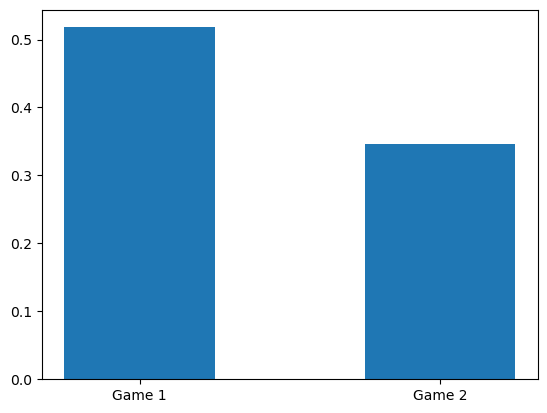

In [143]:
plt.bar(['Game 1', 'Game 2'],[freq1, freq2], width = 0.5)

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [144]:
die1 = Die(np.array([1,2,3,4,5,6]))
die2 = Die(np.array([1,2,3,4,5,6]))
die3 = Die(np.array([1,2,3,4,5,6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [145]:
die1.set_weight(6, 5)
die1.weights

[1, 1, 1, 1, 1, 5]

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [146]:
die2.set_weight(1, 5)
die2.weights

[5, 1, 1, 1, 1, 1]

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [147]:
die1 = Die(np.array([1,2,3,4,5,6]))
die2 = Die(np.array([1,2,3,4,5,6]))
die3 = Die(np.array([1,2,3,4,5,6]))
die4 = Die(np.array([1,2,3,4,5,6]))
die5 = Die(np.array([1,2,3,4,5,6]))

game1 = Game([die1, die2, die3, die4, die5])
game1.play(10000)
print(game1.recent_results())

             0  1  2  3  4
roll number               
0            2  1  2  4  5
1            6  4  6  1  1
2            6  2  3  4  2
3            1  1  6  3  6
4            5  2  2  5  4
...         .. .. .. .. ..
9995         6  1  5  2  4
9996         6  2  4  5  2
9997         5  6  1  2  4
9998         3  6  6  5  4
9999         4  3  1  3  4

[10000 rows x 5 columns]


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [148]:
die1 = Die(np.array([1,2,3,4,5,6]))
die2 = Die(np.array([1,2,3,4,5,6]))
die3 = Die(np.array([1,2,3,4,5,6]))
die4 = Die(np.array([1,2,3,4,5,6]))
die5 = Die(np.array([1,2,3,4,5,6]))

die1.set_weight(6, 5)
die2.set_weight(1, 5)

game2 = Game([die1, die2, die3, die4, die5])
game2.play(10000)
print(game2.recent_results())

             0  1  2  3  4
roll number               
0            6  1  4  4  6
1            6  1  4  5  1
2            1  1  2  5  5
3            1  6  5  6  5
4            6  1  2  4  1
...         .. .. .. .. ..
9995         1  6  6  1  4
9996         4  1  3  4  1
9997         6  5  1  3  2
9998         6  1  5  2  2
9999         6  1  5  4  1

[10000 rows x 5 columns]


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

4 10


<BarContainer object of 2 artists>

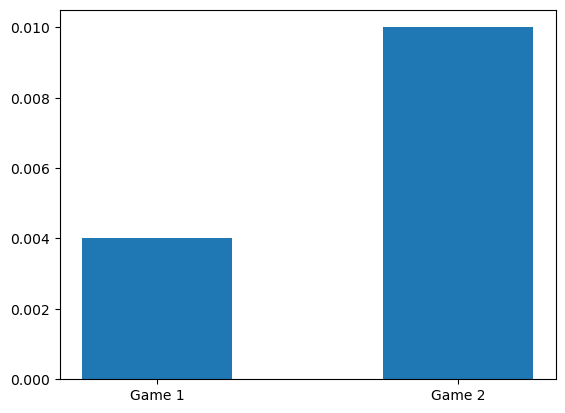

In [149]:
analyzer1 = Analyzer(game1)
analyzer2 = Analyzer(game2)
print(analyzer1.jackpot(), analyzer2.jackpot())
freq1 = analyzer1.jackpot() / 1000
freq2 = analyzer2.jackpot() / 1000
plt.bar(['Game 1', 'Game 2'],[freq1, freq2], width = 0.5)

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [150]:
english_df = pd.read_csv('english_letters.txt', delimiter=' ', header= None)
letters = english_df[0].tolist()
weights = english_df[1].tolist()

die = Die(np.array(letters))
for i in range(len(letters)):
    die.set_weight(letters[i], weights[i])

print(die.die_df)

     weights
E  529117365
T  390965105
A  374061888
O  326627740
I  320410057
N  313720540
S  294300210
R  277000841
H  216768975
L  183996130
D  169330528
C  138416451
U  117295780
M  110504544
F   95422055
G   91258980
P   90376747
W   79843664
Y   75294515
B   70195826
V   46337161
K   35373464
J    9613410
X    8369915
Z    4975847
Q    4550166


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [151]:
die1 = Die(np.array(letters))
die2 = Die(np.array(letters))
die3 = Die(np.array(letters))
die4 = Die(np.array(letters))
dice = [die1, die2, die3, die4]

for die in dice:
    for i in range(len(letters)):
        die.set_weight(letters[i], weights[i])

game1 = Game(dice)
game1.play(1000)
print(game1.recent_results())


             0  1  2  3
roll number            
0            E  T  T  U
1            S  A  O  S
2            N  O  T  C
3            S  S  A  I
4            I  A  L  O
...         .. .. .. ..
995          S  R  R  B
996          V  C  E  E
997          T  S  O  P
998          A  D  O  O
999          T  S  O  D

[1000 rows x 4 columns]


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [152]:
analyzer1 = Analyzer(game1)
vocab = pd.read_csv('scrabble_words.txt', header=None)[0].tolist()

perm_df = analyzer1.permutation_count().to_frame()
perm_words = [''.join(tup) for tup in perm_df.index]
word_count = sum([word in vocab for word in perm_words])

print(word_count)

43


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [153]:
die1 = Die(np.array(letters))
die2 = Die(np.array(letters))
die3 = Die(np.array(letters))
die4 = Die(np.array(letters))
die5 = Die(np.array(letters))
dice = [die1, die2, die3, die4, die5]

for die in dice:
    for i in range(len(letters)):
        die.set_weight(letters[i], weights[i])

game2 = Game(dice)
game2.play(1000)
print(game2.recent_results())

             0  1  2  3  4
roll number               
0            I  E  C  M  A
1            L  M  N  L  R
2            I  L  I  N  R
3            O  O  U  A  S
4            U  T  E  E  S
...         .. .. .. .. ..
995          M  A  E  A  H
996          C  R  T  L  D
997          I  A  G  A  N
998          C  O  R  H  A
999          N  K  F  H  W

[1000 rows x 5 columns]


In [154]:
analyzer2 = Analyzer(game2)
perm_df = analyzer2.permutation_count().to_frame()
perm_words = [''.join(tup) for tup in perm_df.index]
word_count = sum([word in vocab for word in perm_words])

print(word_count)

11


The first game, which had only four dice, had 42 permutations of English words compared to 7 words in the second game. 
The reason for this is that the addition of a fith die decreases the probability that a random roll of five dice will produce a word, as it is easier to roll a four-letter word than a five-letter word.